In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
cancer=load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)


In [6]:
#print(cancer_df.corr())

In [7]:
print(cancer_df.info())
print(cancer_df.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
feature_mean=list(cancer_df.columns[0:10])
feature_worst=list(cancer_df.columns[20:31])


In [9]:
feature_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [10]:
print(len(cancer.target))

#print(cancer.DESCR) # it's better to know about the data-set 
print(len(cancer.data[cancer.target==1])) # it's confusing because benign is listed as 1 


569
357


In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
cancer_df.shape

(569, 30)

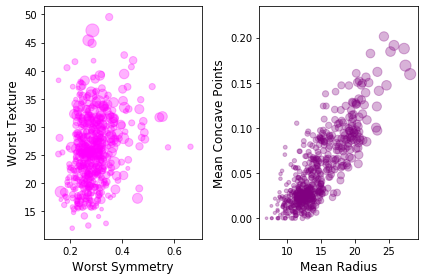

In [13]:
plt.subplot(1,2,1)
plt.scatter(cancer_df['worst symmetry'],cancer_df['worst texture'],s=cancer_df['worst area']*0.05,color='magenta',label='check',alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)
plt.scatter(cancer_df['mean radius'],cancer_df['mean concave points'],s=cancer_df['mean area']*0.05,color='purple',label='check',alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

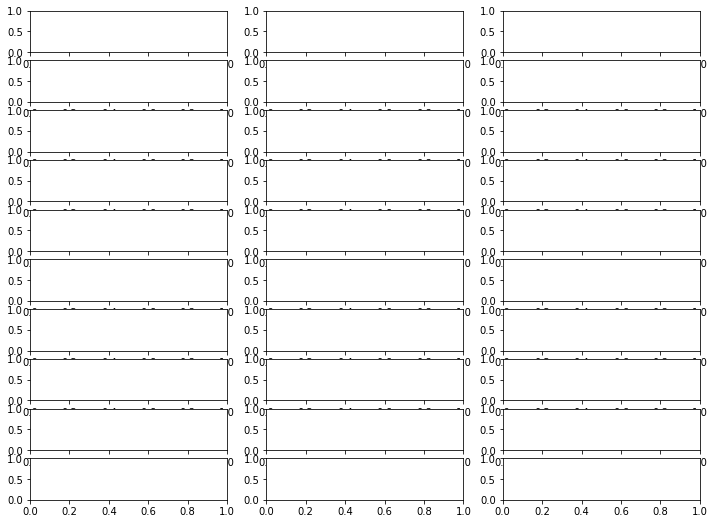

In [14]:
fig,axes =plt.subplots(10,3, figsize=(12, 9))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]


In [15]:
ax=axes.ravel()

In [16]:
for i in range(30):
	_,bins=np.histogram(cancer.data[:,i],bins=40)
	ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)
	ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)
	ax[i].set_title(cancer.feature_names[i],fontsize=9)
	ax[i].axes.get_xaxis().set_visible(False)	
	ax[i].set_yticks(())

In [20]:
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()
#fig.subplots_adjust(lspace=2)
#plt.suptitle("Cancer Histograms", fontsize=4)		
plt.show() # not given in Muller book but it's necessary to see the plots 

<Figure size 432x288 with 0 Axes>

In [21]:
scaler = StandardScaler() # standardized feature by removing mean and scaled to unit variance 
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)


print("after scaling", X_scaled.min(axis=0))


after scaling [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [22]:
pca = PCA(n_components=3) # instantiate the PCA and keep the first n components
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
x_pca=pca.transform(X_scaled)

In [24]:
x_pca.shape

(569, 3)

In [32]:
#x_pca.explained_variance

In [28]:
ex_variance=np.var(x_pca,axis=0)

In [30]:
ex_variance_rat=ex_variance/np.sum(ex_variance)

In [31]:
ex_variance_rat


array([0.60950217, 0.2611802 , 0.12931763])

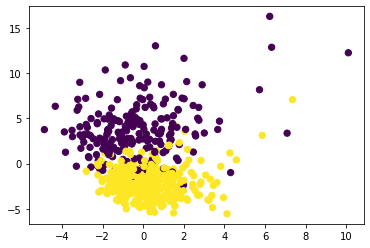

In [34]:
fig=plt.figure(figsize=(6,4))
p=plt.scatter(x_pca[:,2],x_pca[:,0],s=40,c=cancer.target) # c =cancer.target tells that minimum/maximum values of c corresponds to bottom/up of the plots 


In [ ]:
Xax=x_pca[:,0]
Yax=x_pca[:,1]
labels=cancer.target
#labels=['Malignant','Benign']
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
	ix=np.where(labels==l)
	ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])